In [47]:
import os
import numpy as np

In [1]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt

Importing plotly failed. Interactive plots will not work.


In [2]:
spy_path='C:\\data\\work\\spy'

In [5]:
arr = os.listdir('C:\\data\\work\\spy')
print(arr)

['20201228.json', '20201229.json', '20201230.json', '20201231.json', '20210104.json', '20210105.json', '20210106.json', '20210107.json', '20210108.json']


In [28]:
series1 = pd.read_json(spy_path + '\\20201228.json',convert_dates =False)

In [29]:
series1.head()

,date,minute,label,high,low,average,volume,notional,numberOfTrades,marketHigh,...,marketAverage,marketVolume,marketNotional,marketNumberOfTrades,open,close,marketOpen,marketClose,changeOverTime,marketChangeOverTime
0,2020-12-28,09:30,09:30 AM,371.830,371.490,371.679,2307,857463.955,23,371.830,...,371.677,587855,2.184924e+08,1623,371.77,371.515,371.74,371.52,0.000000,0.000000
1,2020-12-28,09:31,09:31 AM,371.590,371.380,371.511,3502,1301030.780,20,371.610,...,371.478,215699,8.012740e+07,1287,371.43,371.400,371.50,371.40,-0.000452,-0.000535
2,2020-12-28,09:32,09:32 AM,371.360,371.235,371.302,300,111390.500,3,371.400,...,371.299,155369,5.768835e+07,804,371.36,371.235,371.40,371.23,-0.001014,-0.001017
3,2020-12-28,09:33,09:33 AM,371.295,371.190,371.219,1427,529728.965,11,371.295,...,371.208,150136,5.573175e+07,890,371.20,371.200,371.22,371.22,-0.001238,-0.001262
4,2020-12-28,09:34,09:34 AM,371.275,371.110,371.156,1756,651750.780,17,371.300,...,371.145,179079,6.646433e+07,1053,371.19,371.275,371.21,371.30,-0.001407,-0.001431


In [30]:
series1.dtypes

date                     object
minute                   object
label                    object
high                    float64
low                     float64
average                 float64
volume                    int64
notional                float64
numberOfTrades            int64
marketHigh              float64
marketLow               float64
marketAverage           float64
marketVolume              int64
marketNotional          float64
marketNumberOfTrades      int64
open                    float64
close                   float64
marketOpen              float64
marketClose             float64
changeOverTime          float64
marketChangeOverTime    float64
dtype: object

In [33]:
t = series1.date+ " " + series1.minute

In [34]:
t

0      2020-12-28 09:30
1      2020-12-28 09:31
2      2020-12-28 09:32
3      2020-12-28 09:33
4      2020-12-28 09:34
             ...       
385    2020-12-28 15:55
386    2020-12-28 15:56
387    2020-12-28 15:57
388    2020-12-28 15:58
389    2020-12-28 15:59
Length: 390, dtype: object

In [35]:
td = pd.to_datetime(t)

In [36]:
td.head()

0   2020-12-28 09:30:00
1   2020-12-28 09:31:00
2   2020-12-28 09:32:00
3   2020-12-28 09:33:00
4   2020-12-28 09:34:00
dtype: datetime64[ns]

In [40]:
ts_1 = pd.DataFrame(td)

In [42]:
ts_1['value']= series1['average']

In [43]:
ts_1.head()

,0,value
0,2020-12-28 09:30:00,371.679
1,2020-12-28 09:31:00,371.511
2,2020-12-28 09:32:00,371.302
3,2020-12-28 09:33:00,371.219
4,2020-12-28 09:34:00,371.156


In [51]:
ts_1.columns =['ds','y']

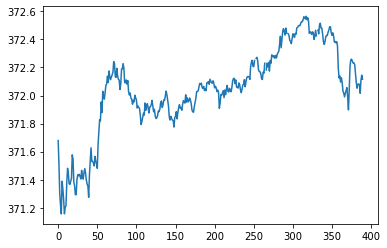

In [48]:
plt.plot(np.arange(ts_1.shape[0]),ts_1['Y'])

In [102]:
m= Prophet()

In [56]:
ts_1.isnull().sum()

ds    0
y     5
dtype: int64

In [68]:
ts_1[ts_1.y.isnull()]['y'] 

252       NaN
265       NaN
293       NaN
331       NaN
average   NaN
Name: y, dtype: float64

In [71]:
ts_1.drop('average',inplace=True)

In [72]:
ts_1.tail()

,ds,y
385,2020-12-28 15:55:00,372.077
386,2020-12-28 15:56:00,372.016
387,2020-12-28 15:57:00,372.109
388,2020-12-28 15:58:00,372.145
389,2020-12-28 15:59:00,372.116


In [81]:
null_indices = ts_1[ts_1.y.isnull()].index.values
null_indices 

array([252, 265, 293, 331], dtype=object)

In [87]:
ts_1.loc[null_indices ,'y']=ts_1['y'][ts_1[ts_1.y.isnull()].index.values-1].values

In [88]:
ts_1.loc[null_indices ,'y']

252    372.250
265    372.230
293    372.445
331    372.425
Name: y, dtype: float64

In [90]:
ts_1.isnull().sum()

ds    0
y     0
dtype: int64

In [103]:
m.fit(ts_1)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [117]:
future = m.make_future_dataframe(periods=60,freq='min')
future.tail()

,ds
445,2020-12-28 16:55:00
446,2020-12-28 16:56:00
447,2020-12-28 16:57:00
448,2020-12-28 16:58:00
449,2020-12-28 16:59:00


In [118]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
445,2020-12-28 16:55:00,371.666726,370.260709,373.011618
446,2020-12-28 16:56:00,371.659918,370.243305,373.025794
447,2020-12-28 16:57:00,371.653109,370.173701,372.999626
448,2020-12-28 16:58:00,371.646300,370.123753,373.088552
449,2020-12-28 16:59:00,371.639492,370.084593,373.082385


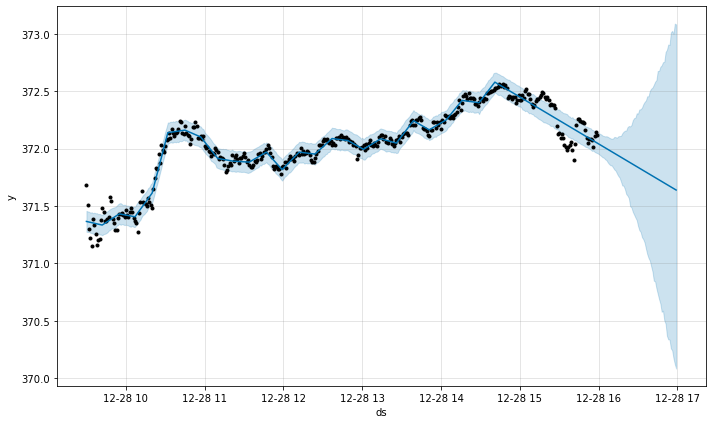

In [119]:
fig1 = m.plot(forecast)


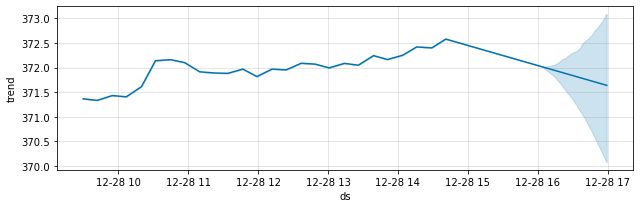

In [120]:
fig2 = m.plot_components(forecast)


In [ ]:
path = 'C:\data\work\web-traffic\web-traffic-time-series-forecasting'

In [2]:
import pandas as pd

In [8]:
 path + '\train_1.csv'

In [19]:
data = pd.read_csv(path  + '\\train_1-csv\\train_1.csv')

In [21]:
data.head(10)

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0
5,5566_zh.wikipedia.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,...,16.0,27.0,8.0,17.0,32.0,19.0,23.0,17.0,17.0,50.0
6,91Days_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,7.0,33.0,8.0,11.0,4.0,15.0,6.0,8.0,6.0
7,A'N'D_zh.wikipedia.org_all-access_spider,118.0,26.0,30.0,24.0,29.0,127.0,53.0,37.0,20.0,...,64.0,35.0,35.0,28.0,20.0,23.0,32.0,39.0,32.0,17.0
8,AKB48_zh.wikipedia.org_all-access_spider,5.0,23.0,14.0,12.0,9.0,9.0,35.0,15.0,14.0,...,34.0,105.0,72.0,36.0,33.0,30.0,36.0,38.0,31.0,97.0
9,ASCII_zh.wikipedia.org_all-access_spider,6.0,3.0,5.0,12.0,6.0,5.0,4.0,13.0,9.0,...,25.0,17.0,22.0,29.0,30.0,29.0,35.0,44.0,26.0,41.0


In [22]:
data.shape

(145063, 551)

In [27]:
data1 = pd.read_csv(path  + '\\train_2-csv\\train_2.csv')

In [26]:
data1.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,19.0,33.0,33.0,18,16.0,27,29,23,54.0,38.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,32.0,30.0,11.0,19,54.0,25,26,23,13.0,81.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,6.0,6.0,7.0,2,4.0,7,3,4,7.0,6.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,7.0,19.0,19.0,9,6.0,16,19,30,38.0,4.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.0,16.0,19.0,9,20.0,23,28,14,8.0,7.0


In [13]:
import os

In [16]:
arr = os.listdir('c:\data\work\web-traffic\web-traffic-time-series-forecasting\\train_1-csv')

In [17]:
print(arr)

['train_1.csv']


In [29]:
path_m5='C:\data\work\m5\m5-forecasting-accuracy'

In [30]:
data2 = pd.read_csv(path_m5  + '\\sales_train_evaluation.csv')

In [31]:
data2.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


In [32]:
data2 = pd.read_csv(path_m5  + '\\sell_prices.csv')

In [33]:
data2.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [34]:
path_m4 = 'C:\\data\\work\\m4\\archive'

In [35]:
arr = os.listdir(path_m4)

In [36]:
print(arr)

['Daily-test.csv', 'Daily-train.csv', 'Hourly-test.csv', 'Hourly-train.csv', 'm4_info.csv', 'Monthly-test.csv', 'Monthly-train.csv', 'Quarterly-test.csv', 'Quarterly-train.csv', 'Weekly-test.csv', 'Weekly-train.csv', 'Yearly-test.csv', 'Yearly-train.csv']


In [37]:
daily_test= pd.read_csv(path_m4 + '\\Daily-test.csv')

In [38]:
daily_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
0,D1,2039.20,2035.00,2051.80,2061.8,2063.50,2069.5,2054.00,2057.00,2062.80,2066.40,2067.40,2071.40,2083.80,2080.60
1,D2,2986.00,3001.20,2975.90,2996.1,2981.90,2985.5,2975.80,2956.20,2964.70,2989.00,2991.40,3024.90,3070.80,3076.90
2,D3,1120.70,1117.90,1115.10,1112.3,1109.50,1106.7,1103.90,1101.10,1098.30,1095.50,1092.70,1089.90,1087.10,1084.30
3,D4,1190.00,1162.00,1134.00,1106.0,1078.00,1050.0,1022.00,994.00,966.00,938.00,910.00,1428.00,1400.00,1372.00
4,D5,5904.67,5917.05,5922.58,5928.8,5935.29,6002.8,6009.47,6014.82,6020.19,6072.49,6077.72,6080.23,6082.75,6108.07


In [40]:
daily_test.shape

(4227, 15)

In [41]:
daily_train= pd.read_csv(path_m4 + '\\Daily-train.csv')

In [42]:
daily_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V9911,V9912,V9913,V9914,V9915,V9916,V9917,V9918,V9919,V9920
0,D1,1017.10,1019.30,1017.00,1019.20,1018.70,1015.60,1018.50,1018.30,1018.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,D2,2793.70,2793.80,2803.70,2805.80,2802.30,2795.00,2806.40,2782.20,2780.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,D3,1091.30,1088.50,1085.70,1082.90,1080.10,1077.30,1074.50,1071.70,1068.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,D4,1092.00,1078.00,1064.00,1050.00,1036.00,1022.00,1008.00,1092.00,1078.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,D5,2938.63,2956.44,2964.41,2972.41,3014.97,3014.23,3024.08,3031.97,3062.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
daily_train.columns[daily_train.isnull().sum()>0]

Index(['V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103',
       'V104',
       ...
       'V9911', 'V9912', 'V9913', 'V9914', 'V9915', 'V9916', 'V9917', 'V9918',
       'V9919', 'V9920'],
      dtype='object', length=9826)

In [52]:
daily_train.iloc[1,:][daily_train.iloc[1,:].isnull()==False]

V1           D2
V2       2793.7
V3       2793.8
V4       2803.7
V5       2805.8
          ...  
V1003      2978
V1004    2991.9
V1005    2995.3
V1006    3000.5
V1007    2968.5
Name: 1, Length: 1007, dtype: object

In [53]:
import matplotlib.pyplot as plt

In [93]:
arr = os.listdir('C:\\data\\work\\spy')
print(arr)

['20201228.json', '20201229.json', '20201230.json', '20201231.json', '20210104.json', '20210105.json', '20210106.json', '20210107.json', '20210108.json']


In [94]:
spy_path='C:\\data\\work\\spy'

In [95]:
data1 = pd.read_json(spy_path + '\\20201228.json' )

In [96]:
data1.head()

,date,minute,label,high,low,average,volume,notional,numberOfTrades,marketHigh,...,marketAverage,marketVolume,marketNotional,marketNumberOfTrades,open,close,marketOpen,marketClose,changeOverTime,marketChangeOverTime
0,2020-12-28,09:30,09:30 AM,371.830,371.490,371.679,2307,857463.955,23,371.830,...,371.677,587855,2.184924e+08,1623,371.77,371.515,371.74,371.52,0.000000,0.000000
1,2020-12-28,09:31,09:31 AM,371.590,371.380,371.511,3502,1301030.780,20,371.610,...,371.478,215699,8.012740e+07,1287,371.43,371.400,371.50,371.40,-0.000452,-0.000535
2,2020-12-28,09:32,09:32 AM,371.360,371.235,371.302,300,111390.500,3,371.400,...,371.299,155369,5.768835e+07,804,371.36,371.235,371.40,371.23,-0.001014,-0.001017
3,2020-12-28,09:33,09:33 AM,371.295,371.190,371.219,1427,529728.965,11,371.295,...,371.208,150136,5.573175e+07,890,371.20,371.200,371.22,371.22,-0.001238,-0.001262
4,2020-12-28,09:34,09:34 AM,371.275,371.110,371.156,1756,651750.780,17,371.300,...,371.145,179079,6.646433e+07,1053,371.19,371.275,371.21,371.30,-0.001407,-0.001431


In [99]:
data1.shape

(390, 21)

In [101]:
data1.columns

Index(['date', 'minute', 'label', 'high', 'low', 'average', 'volume',
       'notional', 'numberOfTrades', 'marketHigh', 'marketLow',
       'marketAverage', 'marketVolume', 'marketNotional',
       'marketNumberOfTrades', 'open', 'close', 'marketOpen', 'marketClose',
       'changeOverTime', 'marketChangeOverTime'],
      dtype='object')

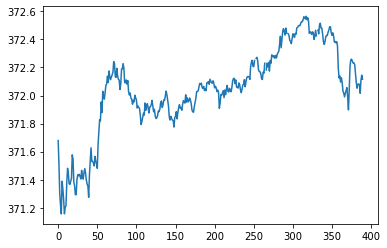

In [102]:
plt.plot(data1.average)

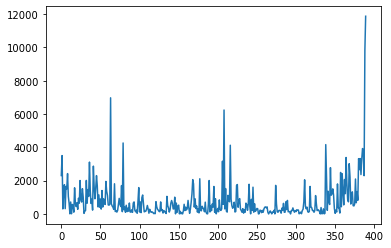

In [104]:
plt.plot(data1.volume)

In [103]:
data1.tail()

,date,minute,label,high,low,average,volume,notional,numberOfTrades,marketHigh,...,marketAverage,marketVolume,marketNotional,marketNumberOfTrades,open,close,marketOpen,marketClose,changeOverTime,marketChangeOverTime
385,2020-12-28,15:55,3:55 PM,372.175,372.000,372.077,3925,1460404.085,37,372.180,...,372.072,248902,9.260937e+07,1325,372.070,372.050,372.040,372.055,0.001071,0.001063
386,2020-12-28,15:56,3:56 PM,372.065,371.970,372.016,3765,1400640.675,45,372.090,...,372.019,259637,9.658990e+07,1143,372.065,371.970,372.055,372.040,0.000907,0.000920
387,2020-12-28,15:57,3:57 PM,372.130,372.065,372.109,2295,853990.455,32,372.150,...,372.107,216475,8.055189e+07,1185,372.130,372.120,372.050,372.120,0.001157,0.001157
388,2020-12-28,15:58,3:58 PM,372.205,372.110,372.145,9810,3650740.410,108,372.215,...,372.151,443977,1.652266e+08,2184,372.115,372.195,372.120,372.215,0.001254,0.001275
389,2020-12-28,15:59,3:59 PM,372.270,372.030,372.116,11869,4416647.220,89,372.280,...,372.142,1610027,5.991586e+08,5988,372.240,372.130,372.220,372.140,0.001176,0.001251
